# read large csv file and count occurances

In [2]:
import csv
import collections
import feather

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import sparse

In [3]:
path = 'data/out.csv'

In [158]:
input_file = open(path)
reader = csv.reader(input_file, delimiter=',')
next(reader)

['crsp_portno',
 'report_dt',
 'security_rank',
 'eff_dt',
 'percent_tna',
 'nbr_shares',
 'market_val',
 'crsp_company_key',
 'security_name',
 'cusip',
 'permno',
 'permco',
 'ticker',
 'coupon',
 'maturity_dt']

## Test

In [159]:
reader = csv.reader(input_file, delimiter=',')
header = [next(reader) for x in range(1_000_000)]

In [160]:
header = pd.DataFrame(header,columns=
['crsp_portno',
 'report_dt',
 'security_rank',
 'eff_dt',
 'percent_tna',
 'nbr_shares',
 'market_val',
 'crsp_company_key',
 'security_name',
 'cusip',
 'permno',
 'permco',
 'ticker',
 'coupon',
 'maturity_dt'])

In [161]:
header.shape

(1000000, 15)

In [181]:
duplicates = header.duplicated(subset = ['crsp_portno','report_dt','crsp_company_key'],keep = False)
duplicates = header.loc[duplicates]

In [182]:
duplicates = duplicates.sort_values(by=['crsp_portno','report_dt','crsp_company_key'])

In [183]:
pd.to_numeric(duplicates.percent_tna)

74.07997746020555

# Def two functions

In [58]:
# Simple version
def extra_reader(reader_object):
    stocks = collections.Counter()
    port_ID = collections.Counter()
    
    for row in reader_object:
        port_ID_str = row[0][:-2] + '-' + row[1][:-2]
        port_ID[port_ID_str] += 1
        stocks[row[7][:-2]] += 1

    return(port_ID,stocks)  

In [59]:
%%time
#port_ID, stocks = extra_reader(reader)
port_ID, stocks = extra_reader(header)

CPU times: user 1.31 s, sys: 7.46 ms, total: 1.32 s
Wall time: 1.32 s


# TODO -> Function

# Create stock map

In [60]:
unique_stocks = list(stocks.keys())
unique_stocks_num = list(np.arange(len(unique_stocks)))

stock_map = dict(zip(unique_stocks, unique_stocks_num))

In [61]:
total_number_rows = sum(list(stocks.values()))
print('Total number of rows in file {:,}'.format(total_number_rows))

Total number of rows in file 1,000,000


In [62]:
print('Numer of unique stocks: {:,}'.format(len(unique_stocks)))

Numer of unique stocks: 23,368


In [63]:
for key,val in stock_map.items():
    print(key, "=>", val)

3013264 => 0
3005389 => 1
3015394 => 2
3010506 => 3
3009784 => 4
3008139 => 5
3003160 => 6
3007896 => 7
3008622 => 8
3015185 => 9
3013041 => 10
3002136 => 11
3011129 => 12
3003782 => 13
3007692 => 14
3014981 => 15
3014680 => 16
3002043 => 17
3012846 => 18
3001026 => 19
3004472 => 20
3000410 => 21
3000058 => 22
3009906 => 23
3010554 => 24
3004569 => 25
3002286 => 26
3004853 => 27
3014776 => 28
3007103 => 29
3007161 => 30
3003420 => 31
3005432 => 32
3005154 => 33
3008381 => 34
3008525 => 35
3006784 => 36
3003478 => 37
3004964 => 38
3011252 => 39
3000902 => 40
3007164 => 41
3005727 => 42
3002283 => 43
3012863 => 44
3011374 => 45
3011505 => 46
3007539 => 47
3002481 => 48
3012142 => 49
3012695 => 50
3011124 => 51
3011776 => 52
3004257 => 53
3000958 => 54
3015415 => 55
3005790 => 56
3010362 => 57
3005445 => 58
3006606 => 59
3007746 => 60
3004399 => 61
3005658 => 62
3010608 => 63
3006253 => 64
3001641 => 65
3011959 => 66
3007726 => 67
3002372 => 68
3004604 => 69
3001719 => 70
3003197 => 71
30

4417628 => 663
4367900 => 664
4347291 => 665
4362709 => 666
4347460 => 667
4362143 => 668
3610493 => 669
4360493 => 670
4360701 => 671
4347854 => 672
4347919 => 673
4386518 => 674
4510572 => 675
4360124 => 676
4359151 => 677
4347516 => 678
4359408 => 679
3615096 => 680
3642467 => 681
4385973 => 682
4360569 => 683
4345984 => 684
4361964 => 685
4345262 => 686
3611843 => 687
4533026 => 688
4359113 => 689
4368462 => 690
3641061 => 691
4359384 => 692
3615608 => 693
3636298 => 694
4359752 => 695
3014691 => 696
4361953 => 697
4380652 => 698
4360771 => 699
4361578 => 700
4416060 => 701
4360204 => 702
4359302 => 703
3629396 => 704
4360429 => 705
3619802 => 706
4360638 => 707
4358872 => 708
3642076 => 709
4348381 => 710
4350292 => 711
3628847 => 712
4360136 => 713
3614735 => 714
4346068 => 715
3641820 => 716
4561934 => 717
3629635 => 718
4348486 => 719
3609436 => 720
4347437 => 721
4359278 => 722
4360730 => 723
3614765 => 724
4346622 => 725
3630164 => 726
4358876 => 727
4373178 => 728
4361571 =>

3014666 => 1330
3014865 => 1331
3013292 => 1332
3001143 => 1333
3008753 => 1334
3008261 => 1335
3000942 => 1336
3001014 => 1337
3000492 => 1338
3000123 => 1339
3001050 => 1340
3010742 => 1341
3003781 => 1342
3011708 => 1343
3004714 => 1344
3004517 => 1345
3007493 => 1346
3011599 => 1347
3015387 => 1348
3012048 => 1349
3003555 => 1350
3006783 => 1351
3006110 => 1352
3013814 => 1353
3012862 => 1354
3003905 => 1355
3000705 => 1356
3004001 => 1357
3004082 => 1358
3001699 => 1359
3006333 => 1360
3002054 => 1361
3000851 => 1362
3001232 => 1363
3010079 => 1364
3001757 => 1365
3014097 => 1366
3002596 => 1367
3006596 => 1368
3000622 => 1369
3008236 => 1370
3008185 => 1371
3003392 => 1372
3013677 => 1373
3015165 => 1374
3014493 => 1375
3006962 => 1376
3001383 => 1377
3004233 => 1378
3013712 => 1379
3014704 => 1380
3011288 => 1381
3003290 => 1382
3002630 => 1383
3012547 => 1384
3014247 => 1385
3007787 => 1386
3004313 => 1387
3006267 => 1388
3005945 => 1389
3005298 => 1390
3004085 => 1391
3009605 

3021303 => 2017
3022268 => 2018
3001229 => 2019
3005402 => 2020
3003180 => 2021
3019642 => 2022
3004174 => 2023
3006146 => 2024
3007637 => 2025
3015980 => 2026
3019168 => 2027
3023144 => 2028
3019093 => 2029
3000984 => 2030
3016448 => 2031
3019164 => 2032
3008413 => 2033
3015603 => 2034
3017554 => 2035
3010515 => 2036
3016968 => 2037
3003370 => 2038
3024262 => 2039
3004635 => 2040
3020486 => 2041
3012228 => 2042
3020855 => 2043
3016436 => 2044
3010679 => 2045
3022279 => 2046
3020474 => 2047
3022630 => 2048
3016331 => 2049
3012147 => 2050
3019669 => 2051
3006099 => 2052
3020368 => 2053
3011388 => 2054
3011386 => 2055
3015049 => 2056
3020475 => 2057
3004669 => 2058
3023367 => 2059
3008416 => 2060
3013412 => 2061
3022419 => 2062
3017551 => 2063
3013931 => 2064
3022591 => 2065
3003366 => 2066
3007812 => 2067
3001693 => 2068
3015073 => 2069
3006744 => 2070
3025189 => 2071
3025311 => 2072
3025315 => 2073
3025316 => 2074
3025320 => 2075
3025326 => 2076
3025483 => 2077
3025543 => 2078
3017329 

4363743 => 2824
3617459 => 2825
4347427 => 2826
4419599 => 2827
4362604 => 2828
3457788 => 2829
3623160 => 2830
4348783 => 2831
3605580 => 2832
4345955 => 2833
4344697 => 2834
4349109 => 2835
4434155 => 2836
4348602 => 2837
4349391 => 2838
3765252 => 2839
3013413 => 2840
4345255 => 2841
4344586 => 2842
4349925 => 2843
4345788 => 2844
4346058 => 2845
4353985 => 2846
4349783 => 2847
4348087 => 2848
4426154 => 2849
3628701 => 2850
3644637 => 2851
4359501 => 2852
4345874 => 2853
4348349 => 2854
4375736 => 2855
3620956 => 2856
4353674 => 2857
4358711 => 2858
3612466 => 2859
3014046 => 2860
4410731 => 2861
4385912 => 2862
4426086 => 2863
4385774 => 2864
4380646 => 2865
4345506 => 2866
4353726 => 2867
4380352 => 2868
4348693 => 2869
4345261 => 2870
3638492 => 2871
4344524 => 2872
4346054 => 2873
4350210 => 2874
4345976 => 2875
3621262 => 2876
4353815 => 2877
4350168 => 2878
3620527 => 2879
4349041 => 2880
4346662 => 2881
4350013 => 2882
4345851 => 2883
4385910 => 2884
3621132 => 2885
4350342 

3620547 => 3496
4359865 => 3497
4358544 => 3498
4348122 => 3499
3611639 => 3500
4345168 => 3501
3615013 => 3502
4349694 => 3503
4386540 => 3504
4344518 => 3505
4359515 => 3506
4345748 => 3507
4501446 => 3508
4344624 => 3509
4345600 => 3510
4345300 => 3511
4361943 => 3512
4348897 => 3513
6819921 => 3514
4347305 => 3515
4359955 => 3516
3643182 => 3517
3617381 => 3518
4386486 => 3519
3633676 => 3520
4360231 => 3521
4344484 => 3522
3623481 => 3523
4430783 => 3524
4347512 => 3525
4346608 => 3526
3615249 => 3527
3625936 => 3528
4359174 => 3529
3644041 => 3530
4360116 => 3531
4386567 => 3532
4344826 => 3533
3642924 => 3534
4362756 => 3535
3615641 => 3536
4386484 => 3537
4386488 => 3538
4344712 => 3539
4359108 => 3540
3613264 => 3541
4345380 => 3542
3624178 => 3543
3622680 => 3544
3641858 => 3545
3614586 => 3546
3625924 => 3547
4430834 => 3548
3644372 => 3549
3609921 => 3550
4359254 => 3551
4360601 => 3552
3625901 => 3553
4511020 => 3554
4354513 => 3555
4359307 => 3556
4358695 => 3557
4363090 

3012359 => 4329
3002355 => 4330
3005281 => 4331
3004656 => 4332
3013826 => 4333
3003557 => 4334
3007937 => 4335
3012664 => 4336
3002757 => 4337
3001132 => 4338
3005024 => 4339
3007909 => 4340
3006010 => 4341
3003785 => 4342
3010505 => 4343
3000411 => 4344
3001629 => 4345
3005567 => 4346
3002564 => 4347
3007769 => 4348
3010264 => 4349
3002730 => 4350
3009233 => 4351
3006248 => 4352
3008829 => 4353
3007283 => 4354
3009830 => 4355
3005173 => 4356
3011215 => 4357
3001222 => 4358
3012175 => 4359
3010420 => 4360
3008213 => 4361
3010151 => 4362
3007696 => 4363
3002069 => 4364
3002976 => 4365
3006063 => 4366
3008259 => 4367
3001390 => 4368
3011870 => 4369
3007194 => 4370
3014023 => 4371
3002175 => 4372
3012701 => 4373
3014145 => 4374
3003842 => 4375
3014546 => 4376
3011373 => 4377
3012902 => 4378
3012610 => 4379
3012877 => 4380
3000853 => 4381
3013550 => 4382
3009842 => 4383
3014822 => 4384
3008360 => 4385
3008158 => 4386
3009444 => 4387
3000802 => 4388
3011092 => 4389
3002879 => 4390
3000002 

3000760 => 5162
3013372 => 5163
3014016 => 5164
3004545 => 5165
3009616 => 5166
3013567 => 5167
3012169 => 5168
3000593 => 5169
3015138 => 5170
3008049 => 5171
3004053 => 5172
3010663 => 5173
3000293 => 5174
3005609 => 5175
3006772 => 5176
3003148 => 5177
3013312 => 5178
3012829 => 5179
3007863 => 5180
3006383 => 5181
3000247 => 5182
3000605 => 5183
3014671 => 5184
3006547 => 5185
3000219 => 5186
3005439 => 5187
3004144 => 5188
3009490 => 5189
3006028 => 5190
3008736 => 5191
3001046 => 5192
3013635 => 5193
3001876 => 5194
3009811 => 5195
3006318 => 5196
3006454 => 5197
3003033 => 5198
3001058 => 5199
3011591 => 5200
3010652 => 5201
3002424 => 5202
3003651 => 5203
3001800 => 5204
3010520 => 5205
3014864 => 5206
3009715 => 5207
3011698 => 5208
3008235 => 5209
3006254 => 5210
3002242 => 5211
3007814 => 5212
3014018 => 5213
3001275 => 5214
3008238 => 5215
3009238 => 5216
3005592 => 5217
3015658 => 5218
3014541 => 5219
3014708 => 5220
3014840 => 5221
3008382 => 5222
3009861 => 5223
3009428 

3000555 => 5939
3004777 => 5940
3004726 => 5941
3008395 => 5942
3007307 => 5943
3015028 => 5944
3008148 => 5945
3010636 => 5946
3011869 => 5947
3030454 => 5948
3584016 => 5949
3603302 => 5950
3538469 => 5951
3102117 => 5952
3025839 => 5953
3623494 => 5954
3591960 => 5955
3310670 => 5956
3567851 => 5957
3434362 => 5958
3604049 => 5959
3113273 => 5960
3563305 => 5961
3584407 => 5962
3140527 => 5963
3570351 => 5964
3590727 => 5965
3663258 => 5966
3669917 => 5967
3451508 => 5968
3132023 => 5969
3168087 => 5970
3522990 => 5971
3868806 => 5972
3416628 => 5973
3592031 => 5974
3604238 => 5975
3502541 => 5976
3483737 => 5977
3102069 => 5978
3092816 => 5979
3566946 => 5980
3140546 => 5981
3098886 => 5982
3167766 => 5983
3442171 => 5984
3053193 => 5985
3604040 => 5986
3603528 => 5987
3148236 => 5988
3025779 => 5989
3069649 => 5990
3310877 => 5991
3449419 => 5992
3116433 => 5993
3701278 => 5994
3036685 => 5995
3526512 => 5996
3414149 => 5997
3031233 => 5998
3102496 => 5999
3470155 => 6000
3027839 

3755450 => 6662
3141403 => 6663
3125628 => 6664
3315034 => 6665
3789905 => 6666
3484501 => 6667
3141878 => 6668
3469117 => 6669
3602368 => 6670
3747954 => 6671
3759873 => 6672
3699586 => 6673
3771487 => 6674
3743348 => 6675
3141533 => 6676
3591352 => 6677
3758296 => 6678
3743516 => 6679
3764923 => 6680
3743514 => 6681
3578930 => 6682
3751460 => 6683
3570550 => 6684
3870653 => 6685
3585429 => 6686
3591674 => 6687
3030784 => 6688
3873114 => 6689
3604674 => 6690
3393869 => 6691
3788697 => 6692
3778753 => 6693
3601783 => 6694
3595561 => 6695
3434213 => 6696
3788809 => 6697
3565539 => 6698
3543260 => 6699
3148143 => 6700
3470455 => 6701
3394406 => 6702
3435556 => 6703
3141202 => 6704
3005742 => 6705
3457865 => 6706
3585292 => 6707
3123368 => 6708
3570486 => 6709
3548185 => 6710
3141041 => 6711
3448326 => 6712
3562510 => 6713
3449454 => 6714
3122485 => 6715
4385330 => 6716
3449435 => 6717
3153846 => 6718
3099502 => 6719
3112550 => 6720
3416152 => 6721
3570571 => 6722
3555646 => 6723
3008729 

3007843 => 7495
3019436 => 7496
3015310 => 7497
3623865 => 7498
4360898 => 7499
4348450 => 7500
6820097 => 7501
4416015 => 7502
4358297 => 7503
3023166 => 7504
4362694 => 7505
3017131 => 7506
3023183 => 7507
4117067 => 7508
3609770 => 7509
4362556 => 7510
3024320 => 7511
3889305 => 7512
3017592 => 7513
3642039 => 7514
3021017 => 7515
3002524 => 7516
4346595 => 7517
3636277 => 7518
3022816 => 7519
4367978 => 7520
3015941 => 7521
3000413 => 7522
4345728 => 7523
4345017 => 7524
3635243 => 7525
4344679 => 7526
4350383 => 7527
4359305 => 7528
3616015 => 7529
3636722 => 7530
4349038 => 7531
3640246 => 7532
4348163 => 7533
4411003 => 7534
4357147 => 7535
4359695 => 7536
4373241 => 7537
4411156 => 7538
4353897 => 7539
4381275 => 7540
4375796 => 7541
3022093 => 7542
3627225 => 7543
4363352 => 7544
3009721 => 7545
3006171 => 7546
4345968 => 7547
3620651 => 7548
3641327 => 7549
3002341 => 7550
3003701 => 7551
3579796 => 7552
3169783 => 7553
3603357 => 7554
3622373 => 7555
4544069 => 7556
3009290 

3013843 => 8328
3005293 => 8329
3014551 => 8330
3008798 => 8331
3010655 => 8332
3004630 => 8333
3007587 => 8334
3014645 => 8335
3003663 => 8336
3000026 => 8337
3011738 => 8338
3008421 => 8339
3001545 => 8340
3008567 => 8341
3012737 => 8342
3012113 => 8343
3000465 => 8344
3014878 => 8345
3000230 => 8346
3011721 => 8347
3011668 => 8348
3013023 => 8349
3013202 => 8350
3008706 => 8351
3009345 => 8352
3005228 => 8353
3005026 => 8354
3008800 => 8355
3002803 => 8356
3011359 => 8357
3004259 => 8358
3013879 => 8359
3008824 => 8360
3012124 => 8361
3013614 => 8362
3008407 => 8363
3011926 => 8364
3013884 => 8365
3009545 => 8366
3001094 => 8367
3010146 => 8368
3005806 => 8369
3008741 => 8370
3011414 => 8371
3002178 => 8372
3005712 => 8373
3006944 => 8374
3002843 => 8375
3004165 => 8376
3000710 => 8377
3009093 => 8378
3009260 => 8379
3015037 => 8380
3013191 => 8381
3013850 => 8382
3001751 => 8383
3000250 => 8384
3004872 => 8385
3009359 => 8386
3013464 => 8387
3013207 => 8388
3005397 => 8389
3011404 

3018401 => 9162
3017262 => 9163
3021724 => 9164
3022620 => 9165
3022621 => 9166
3022284 => 9167
3609758 => 9168
3643514 => 9169
4359031 => 9170
4349348 => 9171
4344830 => 9172
4345400 => 9173
4373400 => 9174
4532883 => 9175
4358747 => 9176
4347961 => 9177
3644270 => 9178
4368440 => 9179
4411337 => 9180
3638818 => 9181
4346424 => 9182
3639910 => 9183
3640778 => 9184
4359580 => 9185
4350213 => 9186
3617068 => 9187
3640761 => 9188
3166899 => 9189
4348571 => 9190
3634090 => 9191
3641913 => 9192
4347337 => 9193
4410705 => 9194
3575440 => 9195
3574249 => 9196
3575429 => 9197
3575268 => 9198
3575401 => 9199
3232401 => 9200
3585324 => 9201
3051276 => 9202
3424447 => 9203
3113335 => 9204
3026862 => 9205
3162455 => 9206
3543060 => 9207
3431431 => 9208
3131992 => 9209
3092566 => 9210
3122282 => 9211
3555350 => 9212
3122352 => 9213
3566952 => 9214
3142283 => 9215
3068309 => 9216
3419945 => 9217
3306590 => 9218
3517131 => 9219
3051813 => 9220
3438476 => 9221
3106589 => 9222
3053023 => 9223
3543833 

3046435 => 9828
3672906 => 9829
3046085 => 9830
3047114 => 9831
3049953 => 9832
3050557 => 9833
3043065 => 9834
3046436 => 9835
3677579 => 9836
3068045 => 9837
3046267 => 9838
3047175 => 9839
3047000 => 9840
3667594 => 9841
3046076 => 9842
3047406 => 9843
3667596 => 9844
3678458 => 9845
3047356 => 9846
3678459 => 9847
3047341 => 9848
3043556 => 9849
3045433 => 9850
3044133 => 9851
3046377 => 9852
3046185 => 9853
3046392 => 9854
3047279 => 9855
3046912 => 9856
3046029 => 9857
3047064 => 9858
3046073 => 9859
3046908 => 9860
3045328 => 9861
3046262 => 9862
3044178 => 9863
3042758 => 9864
3045542 => 9865
3046744 => 9866
3046325 => 9867
3045434 => 9868
3068006 => 9869
3046743 => 9870
3045162 => 9871
3046370 => 9872
3042946 => 9873
3045260 => 9874
3043648 => 9875
3047025 => 9876
3047091 => 9877
3042276 => 9878
3047247 => 9879
3042892 => 9880
3043898 => 9881
3240123 => 9882
3046458 => 9883
3045747 => 9884
3050563 => 9885
3031120 => 9886
3047092 => 9887
3043647 => 9888
3050554 => 9889
3046999 

3002712 => 10661
3014481 => 10662
3020075 => 10663
3010943 => 10664
3007397 => 10665
3007367 => 10666
3023901 => 10667
3013652 => 10668
3012015 => 10669
3000294 => 10670
3012451 => 10671
3022267 => 10672
3015683 => 10673
3017535 => 10674
3024200 => 10675
3024606 => 10676
3003363 => 10677
3017921 => 10678
3013269 => 10679
3020284 => 10680
3017922 => 10681
3014654 => 10682
3001556 => 10683
3001557 => 10684
3024079 => 10685
3025231 => 10686
3020052 => 10687
4360770 => 10688
4380595 => 10689
4348148 => 10690
3625774 => 10691
4346811 => 10692
4349994 => 10693
4379240 => 10694
4360728 => 10695
4348573 => 10696
4347434 => 10697
3637891 => 10698
3608029 => 10699
3619536 => 10700
4358985 => 10701
4359735 => 10702
4344440 => 10703
4347684 => 10704
3622496 => 10705
4346895 => 10706
4359489 => 10707
4346437 => 10708
4368789 => 10709
3637938 => 10710
3641324 => 10711
4359354 => 10712
4353962 => 10713
3628848 => 10714
3618297 => 10715
3609688 => 10716
3639442 => 10717
4347813 => 10718
3642809 => 107

4042325 => 11358
4042342 => 11359
4138745 => 11360
4156870 => 11361
3024743 => 11362
3754451 => 11363
4020093 => 11364
3805900 => 11365
4038294 => 11366
4187397 => 11367
4187486 => 11368
4219696 => 11369
4212826 => 11370
4219726 => 11371
4360628 => 11372
4345793 => 11373
4358371 => 11374
4358932 => 11375
4380997 => 11376
4365651 => 11377
4359941 => 11378
4360254 => 11379
4346711 => 11380
4348028 => 11381
4346290 => 11382
4368559 => 11383
4346134 => 11384
4358408 => 11385
4360006 => 11386
4348096 => 11387
4346529 => 11388
4359678 => 11389
4346692 => 11390
4359696 => 11391
4368009 => 11392
4359975 => 11393
4358354 => 11394
4360447 => 11395
4358704 => 11396
4348058 => 11397
4453676 => 11398
4381104 => 11399
4359041 => 11400
4357606 => 11401
4358858 => 11402
4354363 => 11403
4380577 => 11404
4345885 => 11405
4345096 => 11406
4361181 => 11407
4345097 => 11408
4359331 => 11409
4380897 => 11410
4368763 => 11411
4346958 => 11412
4360530 => 11413
4360676 => 11414
4359954 => 11415
4373418 => 114

4368125 => 11994
4359034 => 11995
4360523 => 11996
4360507 => 11997
4443477 => 11998
4345192 => 11999
4360541 => 12000
4358777 => 12001
4360524 => 12002
4380576 => 12003
4359296 => 12004
4345852 => 12005
4358438 => 12006
4358341 => 12007
4359698 => 12008
4359330 => 12009
4360229 => 12010
4359742 => 12011
4358362 => 12012
4384780 => 12013
4360252 => 12014
4359116 => 12015
4359183 => 12016
4358658 => 12017
4385778 => 12018
4360608 => 12019
4348091 => 12020
4442024 => 12021
4344828 => 12022
4345355 => 12023
4420150 => 12024
4363861 => 12025
4438835 => 12026
4426750 => 12027
4346990 => 12028
4358525 => 12029
4360431 => 12030
3823651 => 12031
3841421 => 12032
4283876 => 12033
4298107 => 12034
4330963 => 12035
4116370 => 12036
4020090 => 12037
4291594 => 12038
4214775 => 12039
4255658 => 12040
4543675 => 12041
6819548 => 12042
6819550 => 12043
3820984 => 12044
3937853 => 12045
4116362 => 12046
4138796 => 12047
4561850 => 12048
4543673 => 12049
7022086 => 12050
7080982 => 12051
4501009 => 120

3070583 => 12827
3068805 => 12828
3789063 => 12829
3763336 => 12830
3419879 => 12831
3724740 => 12832
3728130 => 12833
3251691 => 12834
3700487 => 12835
3771925 => 12836
3148354 => 12837
3724806 => 12838
3123249 => 12839
3153786 => 12840
3717663 => 12841
3203077 => 12842
3763858 => 12843
3742989 => 12844
3755726 => 12845
3591793 => 12846
3122230 => 12847
3310289 => 12848
3749963 => 12849
3051519 => 12850
3667545 => 12851
3047626 => 12852
3150212 => 12853
3590258 => 12854
3419110 => 12855
3098092 => 12856
3528917 => 12857
3456996 => 12858
3139881 => 12859
3513509 => 12860
3313976 => 12861
3431998 => 12862
3470030 => 12863
3556432 => 12864
4433645 => 12865
3072734 => 12866
3769952 => 12867
3769850 => 12868
3564698 => 12869
3114135 => 12870
3029809 => 12871
3310638 => 12872
3121956 => 12873
3585433 => 12874
3525586 => 12875
3600150 => 12876
3693242 => 12877
3416435 => 12878
3769204 => 12879
3763663 => 12880
3099870 => 12881
3166251 => 12882
3467330 => 12883
3754579 => 12884
3166638 => 128

KeyboardInterrupt: 

# Create unique portfolio map (port_no + report_dt)

In [64]:
unique_portno = list(port_ID.keys())
unique_portno_num = list(np.arange(len(unique_portno)))

port_no_map = dict(zip(unique_portno, unique_portno_num))

In [65]:
print('Numer of unique portfolios: {:,}'.format(len(unique_portno)))

Numer of unique portfolios: 6,149


In [ ]:
for key,val in port_no_map.items():
    print(key, "=>", val)

%%time
np.save('data/stock_map.npy', stock_map) 
np.save('data/port_no_map.npy', port_no_map) 

# Set up sparse matrix

In [77]:
stock_map = np.load('data/stock_map.npy') 
stock_map = stock_map.item()
port_no_map_a = np.load('data/port_no_map.npy') 
port_no_map = port_no_map_a.item()

In [205]:
total_number_rows

1000000

In [207]:
input_file = open(path)

reader = csv.reader(input_file, delimiter=',')
next(reader)

sparse_size = total_number_rows = 10_000_000
counter = 0
row_count = 0

sparse_row = np.zeros(sparse_size)
sparse_col = np.zeros(sparse_size)
sparse_data = np.zeros(sparse_size)

for row in reader:
    port_ID_str = row[0][:-2] + '-' + row[1][:-2]
    sparse_row[counter] = port_no_map[port_ID_str]
    
    stock_num = row[7][:-2]
    sparse_col[counter] = stock_map[stock_num]

    if len(row[4])>0:
        data = row[4][:8]
    else:
        data = 0.1

    sparse_data[counter] = data

    counter += 1
    row_count += 1
    
#    if row_count == sparse_size:
#        break
        
    if row_count == total_number_rows:
        break
    
sparse_row = sparse_row.astype(int)
sparse_col = sparse_col.astype(int)

In [114]:
import scipy.sparse as sp

def sp_unique(sp_matrix, axis=0):
    ''' Returns a sparse matrix with the unique rows (axis=0)
    or columns (axis=1) of an input sparse matrix sp_matrix'''
    if axis == 1:
        sp_matrix = sp_matrix.T

    old_format = sp_matrix.getformat()
    dt = np.dtype(sp_matrix)
    ncols = sp_matrix.shape[1]

    if old_format != 'lil':
        sp_matrix = sp_matrix.tolil()

    _, ind = np.unique(sp_matrix.data + sp_matrix.rows, return_index=True)
    rows = sp_matrix.rows[ind]
    data = sp_matrix.data[ind]
    nrows_uniq = data.shape[0]

    sp_matrix = sp.lil_matrix((nrows_uniq, ncols), dtype=dt)  #  or sp_matrix.resize(nrows_uniq, ncols)
    sp_matrix.data = data
    sp_matrix.rows = rows

    ret = sp_matrix.asformat(old_format)
    if axis == 1:
        ret = ret.T        
    return ret

In [214]:
sparse_matrix = sparse.coo_matrix((sparse_data, (sparse_row, sparse_col)))
print('{:,}'.format(sparse_matrix.sum()))
sparse_matrix

4,677,793.970697997


<64726x76866 sparse matrix of type '<class 'numpy.float64'>'
	with 10000000 stored elements in COOrdinate format>

In [211]:
sparse_matrix = sp_unique(sparse_matrix, axis=0)

In [213]:
sparse_matrix = sparse.csr_matrix(sparse_matrix)
print('{:,}'.format(sparse_matrix.sum()))
sparse_matrix

4,673,170.148383997


<64228x76866 sparse matrix of type '<class 'numpy.float64'>'
	with 9942054 stored elements in Compressed Sparse Row format>

path = 'data/large_sparse.npz'
#sparse.save_npz(path, sparse_matrix)

plt.spy(sparse_matrix, markersize = 0.004)

In [100]:
sparse_matrix.shape

(7815, 25530)

In [101]:
print('Total elements: {:,}'.format(sparse_matrix.shape[0] * sparse_matrix.shape[1]))

Total elements: 199,516,950


# Change to date

In [328]:
%%time

left = []
right = []
keys = list(port_no_map.keys())
for i in keys:
    left_temp, right_temp = i.split('-')
    left.append(left_temp)
    right.append(right_temp)
    
int_date = pd.to_numeric(right)
date = pd.to_timedelta(int_date, unit='D') + pd.Timestamp('1960-1-1')

port_ID_new = [m+'-'+str(n.date()) for m,n in zip(left,date)]

CPU times: user 3.66 s, sys: 101 ms, total: 3.76 s
Wall time: 3.75 s


In [344]:
for i in port_ID_new[-10:]:
    print('{}'.format(i))

1034061-2015-10-31
1034061-2015-11-30
1034061-2015-12-31
1034061-2016-01-31
1034061-2016-02-29
1034061-2016-03-31
1034061-2016-04-30
1034061-2016-06-30
1034061-2016-08-31
0-1960-01-01


In [345]:
path = 'data/info_df.feather'
info = feather.read_dataframe(path)

In [351]:
info.head()

,crsp_portno,report_dt,port_ID,crsp_obj_cd,group
0,1000045,2003-03-31,1000045-2003-03-31,EDYB,0
1,1000045,2003-06-30,1000045-2003-06-30,EDYB,1
2,1000045,2003-09-30,1000045-2003-09-30,EDYB,2
3,1000045,2003-12-31,1000045-2003-12-31,EDYB,3
4,1000045,2004-06-30,1000045-2004-06-30,EDYB,4


In [353]:
port_obj_map = dict(zip(info.port_ID, info.crsp_obj_cd))

In [366]:
port_obj_map[port_ID_new[6001]]

'EFRM'

# Analysis

In [217]:
sums = sparse_matrix.sum(1)
sums.argmax()

35406

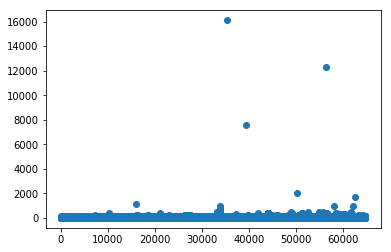

In [218]:
plt.plot(sums,'o')

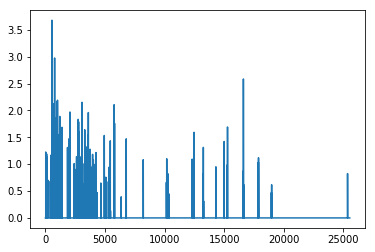

In [197]:
plt.plot(sparse_matrix[5340].todense().T)

In [198]:
sparse_matrix[5340].todense().T.sum()

229.92526399999997

In [226]:
print(sparse_data[sparse_data > 1000],
sparse_col[sparse_data > 1000],
sparse_row[sparse_data > 1000])

[5157.894 3986.841 3728.947 1421.051 1173.683] [ 1187   960  1283 42281 58774] [35406 35406 35406 35406 35406]
